In [1]:
###vse
import gensim

In [2]:
import pandas as pd

import numpy

In [3]:
import pandas as pd
import numpy as np
import nltk
import re
import csv
from nltk.stem import WordNetLemmatizer
import sklearn
import codecs
import pymorphy2
import seaborn as sns
sns.set_style("darkgrid")
from nltk.stem.snowball import SnowballStemmer


import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zero\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:

from nltk.corpus import stopwords
stopWords = set(stopwords.words('russian'))

def csv_to_list(arr):
    arr_list = []
    for row in arr:
        arr_list.append(list_to_str(row))
    return arr_list

def list_to_str(arr):
    str_ = ''
    for rec in arr:
        str_+=rec
    return str_

In [5]:
positive_recalls = csv_to_list(csv.reader(codecs.open(r'C:\Users\Zero\Downloads\negative.csv', 'rU', 'utf-8', errors='ignore')))
negative_recalls = csv_to_list(csv.reader(codecs.open(r'C:\Users\Zero\Downloads\positive.csv', 'rU', 'utf-8', errors='ignore')))

In [6]:

df_positive_recalls = pd.DataFrame(positive_recalls+negative_recalls, columns=['recall'])

df_positive_recalls.head()

recall
0  408907E+17;1386325944;dugarchikbellko;на работ...
1  408907E+17;1386325957;nugemycejela;Коллеги сид...
2  408907E+17;1386325966;4post21;@elina_4post как...
3  408907E+17;1386325980;Poliwake;Желаю хорошего ...
4  408907E+17;1386325980;capyvixowe;Обновил за ка...

In [7]:
from nltk.tokenize import RegexpTokenizer
import time
t = time.time()


tokenizer = RegexpTokenizer(r'\w+')
df_positive_recalls['clean'] = df_positive_recalls['recall'].astype('str') 
df_positive_recalls.dtypes

df_positive_recalls["tokens"] = df_positive_recalls['recall'].apply(tokenizer.tokenize)
# delete Stop Words

print('Time to tokenize everything: {} mins'.format(round((time.time() - t) / 60, 2)))
df_positive_recalls.head()

Time to tokenize everything: 0.07 mins


recall  \
0  408907E+17;1386325944;dugarchikbellko;на работ...   
1  408907E+17;1386325957;nugemycejela;Коллеги сид...   
2  408907E+17;1386325966;4post21;@elina_4post как...   
3  408907E+17;1386325980;Poliwake;Желаю хорошего ...   
4  408907E+17;1386325980;capyvixowe;Обновил за ка...   

                                               clean  \
0  408907E+17;1386325944;dugarchikbellko;на работ...   
1  408907E+17;1386325957;nugemycejela;Коллеги сид...   
2  408907E+17;1386325966;4post21;@elina_4post как...   
3  408907E+17;1386325980;Poliwake;Желаю хорошего ...   
4  408907E+17;1386325980;capyvixowe;Обновил за ка...   

                                              tokens  
0  [408907E, 17, 1386325944, dugarchikbellko, на,...  
1  [408907E, 17, 1386325957, nugemycejela, Коллег...  
2  [408907E, 17, 1386325966, 4post21, elina_4post...  
3  [408907E, 17, 1386325980, Poliwake, Желаю, хор...  
4  [408907E, 17, 1386325980, capyvixowe, Обновил,...

In [8]:
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('russian')
stopwords

stopwords = set(stopwords)

df_clean = df_positive_recalls['clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zero\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
stopWords

{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

In [10]:
df_clean

0         408907E+17;1386325944;dugarchikbellko;на работ...
1         408907E+17;1386325957;nugemycejela;Коллеги сид...
2         408907E+17;1386325966;4post21;@elina_4post гов...
3         408907E+17;1386325980;Poliwake;Желаю хорошего ...
4         408907E+17;1386325980;capyvixowe;Обновил каким...
                                ...                        
275813    411369E+17;1386912922;diminlisenok;Спала родит...
275814    411369E+17;1386912922;qilepocagotu;RT @jebesil...
275815    411369E+17;1386912938;DennyChooo;Что происходи...
275816    411369E+17;1386912938;bedowabymir;"""Любимаяя ...
275817    411369E+17;1386912953;Prituljak_Sibir;@Ma_che_...
Name: clean, Length: 275818, dtype: object

In [11]:
hero=df_clean.str.lower()

In [12]:
import re

patterns = "[0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"

def lemmatize(doc):
    doc = re.sub(patterns, '', doc)
    tokens = []
    for token in doc.split():
        new_token=''
        for char in token:
            if (char not in 'abcdefghijklmnopqrstuvwxyz') and (char not in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
                new_token = str(new_token) + str(char)
        token=new_token
        if token:
            token = token.strip()
            tokens.append(token)
    return tokens
    

In [13]:
data=hero.apply(lemmatize)

In [14]:
data

0         [на, работе, полный, пиддес, каждое, закрытие,...
1         [коллеги, сидят, рубятся, изза, долбанной, вин...
2                          [говорят, обещаного, года, ждут]
3         [желаю, хорошего, полёта, удачной, посадкия, б...
4          [обновил, какимто, лешим, работает, простоплеер]
                                ...                        
275813    [спала, родительском, доме, своей, кровати, пр...
275814    [эх, мы, немного, решили, сократить, путь, леж...
275815    [что, происходит, мной, эфире, звучит, любимая...
275816    [любимаяя, подарю, тебе, звезду, имя, звезды, ...
275817    [посмотри, непытайтесьпокинутьомск, сегодня, в...
Name: clean, Length: 275818, dtype: object

In [18]:
import multiprocessing
import time
#WORD2VEC()
from gensim.models import Word2Vec
w2v_model = Word2Vec(
    min_count=10,
    window=4,
    size=300,
    negative=10,
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    sg=1,workers=4)

#BUILD_VOCAB()
t = time.time()
w2v_model.build_vocab(data, progress_per=1000)
print('Time to build vocab: {} mins'.format(round((time.time() - t) / 60, 2)))

#TRAIN()
#w2v_model.train(data, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
print('Time to train the model: {} mins'.format(round((time.time() - t) / 60, 2)))

Time to build vocab: 0.15 mins
Time to train the model: 0.15 mins


In [15]:
import  gensim as pd
print (pd.__version__)

3.8.3


In [16]:
w2v_model.wv.vocab()

NameError: name 'w2v_model' is not defined

In [54]:
w2v_model.init_sims(replace=True)
w2v_model.wv.save_word2vec_format('2model.bin', binary=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

def tsne_scatterplot(model, word, list_names):
    """Plot in seaborn the results from the t-SNE dimensionality reduction 
    algorithm of the vectors of a query word,
    its list of most similar words, and a list of words."""
    vectors_words = [model.wv.word_vec(word)]
    word_labels = [word]
    color_list = ['red']
    close_words = model.wv.most_similar(word)
    for wrd_score in close_words:
        wrd_vector = model.wv.word_vec(wrd_score[0])
        vectors_words.append(wrd_vector)
        word_labels.append(wrd_score[0])
        color_list.append('blue')
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.word_vec(wrd)
        vectors_words.append(wrd_vector)
        word_labels.append(wrd)
        color_list.append('green')
    # t-SNE reduction
    Y = (TSNE(n_components=2, random_state=0, perplexity=15, init="pca")
        .fit_transform(vectors_words))
    # Sets everything up to plot
    df = pd.DataFrame({"x": [x for x in Y[:, 0]],
                    "y": [y for y in Y[:, 1]],
                    "words": word_labels,
                    "color": color_list})
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    # Basic plot
    p1 = sns.regplot(data=df,
                    x="x",
                    y="y",
                    fit_reg=False,
                    marker="o",
                    scatter_kws={"s": 40,
                                "facecolors": df["color"]}
    )
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
        p1.text(df["x"][line],
                df["y"][line],
                " " + df["words"][line].title(),
                horizontalalignment="left",
                verticalalignment="bottom", size="medium",
                color=df["color"][line],
                weight="normal"
        ).set_size(15)
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [ ]:
tsne_scatterplot(w2v_model, "история", ["неделя", "россия", "зима"])

In [56]:
model1 = w2v_model.wv.load_word2vec_format(r'C:\Users\Zero\2model.bin', binary=True)
model1.syn0

<ipython-input-56-6d094602f216>:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  model1.syn0


array([[ 7.9406105e-02,  5.4627188e-02,  2.9166033e-02, ...,
        -7.8755483e-02, -3.7952621e-02, -4.0016096e-02],
       [ 3.0505944e-02, -3.2168150e-02, -9.4634429e-02, ...,
         6.7068286e-02,  4.9000815e-02, -9.8189764e-02],
       [ 1.1312665e-02, -4.8964642e-02,  3.3715449e-02, ...,
        -2.9258355e-02, -5.3278238e-02,  7.5122222e-02],
       ...,
       [ 8.4411144e-02, -5.5638991e-02, -4.2246502e-02, ...,
         5.6342721e-02,  1.9132415e-02, -6.8664305e-02],
       [-3.8176201e-02, -2.8089429e-05, -9.5838040e-02, ...,
        -2.1881033e-02, -6.2985279e-02, -9.4236620e-02],
       [ 4.5898397e-04,  2.5578886e-02, -4.0720645e-02, ...,
         3.3898782e-02, -1.9476105e-02,  9.2846863e-02]], dtype=float32)

In [40]:
import argparse
import logging
import time
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.WARNING)

In [31]:
word_vectors = model1.syn0# here you load vectors for each word in your model
n_words = word_vectors.shape[0]
vec_size = word_vectors.shape[1]

<ipython-input-31-86cc11a75b55>:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  word_vectors = model1.syn0# here you load vectors for each word in your model


In [32]:
print("#words = {0}, vector size = {1}".format(n_words, vec_size))

#words = 17328, vector size = 300


In [49]:
start = time.time()
print("Compute clustering ... ", end="", flush=True)
kmeans = KMeans(n_clusters=10, n_jobs=-1, random_state=0)
idx = kmeans.fit_predict(word_vectors)
print("finished in {:.2f} sec.".format(time.time() - start), flush=True)

Compute clustering ... 

C:\Users\Zero\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


finished in 7.45 sec.


In [50]:
print("Принадлежность к кластерам:\n{}".format(kmeans.labels_))

Принадлежность к кластерам:
[1 0 0 ... 9 0 2]


In [51]:
import mglearn

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 3

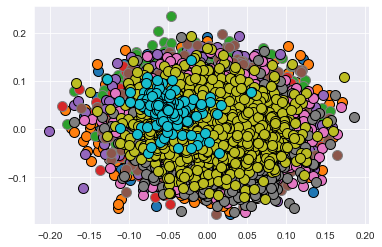

In [52]:
mglearn.discrete_scatter(word_vectors[:, 0], word_vectors[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
 kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
 markers='^', markeredgewidth=2)

In [21]:
from sklearn.cluster import KMeans

In [23]:
def vectorize(line): 
    words = []
    for word in line: # line - iterable, for example list of tokens 
        try:
            w2v_idx = w2v_indices[word]
        except KeyError: # if you does not have a vector for this word in your w2v model, continue 
            continue
        words.append(w2v_vectors[w2v_idx])
        if words: 
            words = np.asarray(words)
            min_vec = words.min(axis=0)
            max_vec = words.max(axis=0)
            return np.concatenate((min_vec, max_vec))
        if not words:
            return None 

In [24]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(metric='cosine', eps=0.07, min_samples=3) # you can change these parameters, given just for example 
cluster_labels = dbscan.fit_predict(w2v_vectors) # where X - is your matrix, where each row corresponds to one document (line) from the docs, you need to cluster 

In [59]:
model1.most_similar("образование")

[('драйв', 0.22592058777809143),
 ('холоднее', 0.21551412343978882),
 ('женя', 0.21373647451400757),
 ('получились', 0.21126383543014526),
 ('теряю', 0.20654787123203278),
 ('монитора', 0.19871872663497925),
 ('преимущество', 0.19565942883491516),
 ('мелкий', 0.1920108199119568),
 ('печени', 0.19121968746185303),
 ('удачки', 0.18840527534484863)]

In [ ]:
a=model1.vectors